# Validation on Preprocessing Data Intake

Runs basic statistics and checks on the preprocessed data from `preprocessing.py`.

In [1]:
import torch
import matplotlib.pyplot as plt

## Read Data

In [2]:
tensors = torch.load('./data/tensors.pt', weights_only=True)
tensors_noise = torch.load('./data/tensors_noise.pt', weights_only=True)

In [3]:
train_percent = 0.9
test_percent = 0.1
train_dataset, test_dataset = torch.utils.data.random_split(tensors, [train_percent, test_percent])
train_dataset_noise, test_dataset_noise = torch.utils.data.random_split(tensors_noise, [train_percent, test_percent])

In [4]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)
train_noise_loader = torch.utils.data.DataLoader(train_dataset_noise, batch_size=32, shuffle=True)
test_noise_loader = torch.utils.data.DataLoader(test_dataset_noise, batch_size=32, shuffle=True)

## Return Dataset Lengths

In [5]:
train_length = len(train_loader.dataset)
test_length = len(test_loader.dataset)
train_noise_length = len(train_noise_loader.dataset)
test_noise_length = len(test_noise_loader.dataset)

print(f'train: {train_length}, test: {test_length}, train w/ noise: {train_noise_length}, test w/ noise: {test_noise_length}')

train: 9000, test: 1000, train w/ noise: 9900, test w/ noise: 1100


## Display Sample Images

In [6]:
def show_image(loader) -> None:
    '''
    Take torch dataloader and output the first image

    Parameters
    ----------
    loader : torch.utils.data.DataLoader
        dataloader for model development
    
    Returns
    -------
    None
    '''
    loader_iter = iter(loader)
    images, labels = next(loader_iter)

    image_tensor = images[0]
    print('image class:\n', labels[0])
    print('image tensor:\n', image_tensor)

    image = image_tensor.permute(1, 2, 0).numpy()

    plt.imshow(image)
    plt.axis('off')
    plt.show()


image class:
 tensor(3)
image tensor:
 tensor([[[0.2588, 0.2627, 0.2627,  ..., 0.2824, 0.2863, 0.2824],
         [0.2627, 0.2667, 0.2667,  ..., 0.2902, 0.2902, 0.2902],
         [0.2627, 0.2627, 0.2667,  ..., 0.2941, 0.2941, 0.2980],
         ...,
         [0.2118, 0.2118, 0.2157,  ..., 0.2078, 0.2118, 0.2118],
         [0.2118, 0.2157, 0.2157,  ..., 0.2118, 0.2118, 0.2118],
         [0.2118, 0.2118, 0.2118,  ..., 0.2118, 0.2118, 0.2118]],

        [[0.2157, 0.2196, 0.2196,  ..., 0.2314, 0.2353, 0.2314],
         [0.2196, 0.2235, 0.2235,  ..., 0.2392, 0.2392, 0.2392],
         [0.2196, 0.2196, 0.2235,  ..., 0.2431, 0.2431, 0.2471],
         ...,
         [0.1608, 0.1608, 0.1647,  ..., 0.1569, 0.1608, 0.1608],
         [0.1608, 0.1647, 0.1647,  ..., 0.1608, 0.1608, 0.1608],
         [0.1608, 0.1608, 0.1608,  ..., 0.1608, 0.1608, 0.1569]],

        [[0.1882, 0.1922, 0.1922,  ..., 0.2039, 0.2078, 0.2039],
         [0.1922, 0.1961, 0.1961,  ..., 0.2118, 0.2118, 0.2118],
         [0.1922, 0

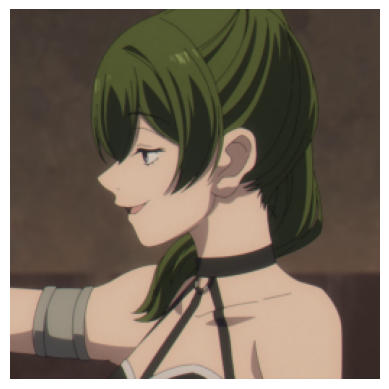

In [7]:
show_image(train_loader)

image class:
 tensor(0)
image tensor:
 tensor([[[0.4588, 0.4627, 0.4588,  ..., 0.5569, 0.5529, 0.5529],
         [0.4588, 0.4588, 0.4549,  ..., 0.5529, 0.5490, 0.5490],
         [0.4549, 0.4549, 0.4471,  ..., 0.5451, 0.5451, 0.5412],
         ...,
         [0.1333, 0.1333, 0.1294,  ..., 0.1216, 0.1216, 0.1216],
         [0.1490, 0.1490, 0.1490,  ..., 0.1216, 0.1216, 0.1216],
         [0.1490, 0.1490, 0.1490,  ..., 0.1216, 0.1216, 0.1216]],

        [[0.4314, 0.4353, 0.4314,  ..., 0.5255, 0.5216, 0.5216],
         [0.4314, 0.4314, 0.4275,  ..., 0.5216, 0.5176, 0.5176],
         [0.4275, 0.4275, 0.4196,  ..., 0.5137, 0.5137, 0.5098],
         ...,
         [0.2314, 0.2275, 0.2235,  ..., 0.1294, 0.1294, 0.1294],
         [0.2784, 0.2784, 0.2745,  ..., 0.1294, 0.1294, 0.1294],
         [0.2902, 0.2941, 0.2941,  ..., 0.1294, 0.1294, 0.1294]],

        [[0.3412, 0.3451, 0.3451,  ..., 0.4235, 0.4196, 0.4157],
         [0.3412, 0.3451, 0.3451,  ..., 0.4196, 0.4157, 0.4118],
         [0.3373, 0

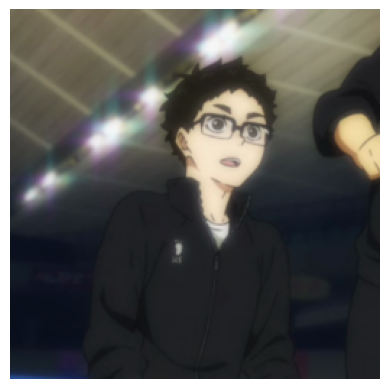

In [8]:
show_image(test_loader)

image class:
 tensor(0)
image tensor:
 tensor([[[0.8980, 0.8980, 0.8941,  ..., 0.9255, 0.9176, 0.9216],
         [0.9059, 0.9020, 0.8980,  ..., 0.9216, 0.9216, 0.9255],
         [0.9098, 0.9098, 0.9059,  ..., 0.9176, 0.9216, 0.9176],
         ...,
         [0.9373, 0.9412, 0.9412,  ..., 0.9373, 0.9373, 0.9373],
         [0.9373, 0.9412, 0.9412,  ..., 0.9412, 0.9373, 0.9373],
         [0.9373, 0.9412, 0.9412,  ..., 0.9373, 0.9412, 0.9373]],

        [[0.6980, 0.6980, 0.6941,  ..., 0.9451, 0.9373, 0.9373],
         [0.7020, 0.6980, 0.6941,  ..., 0.9373, 0.9373, 0.9412],
         [0.7059, 0.7059, 0.7020,  ..., 0.9373, 0.9373, 0.9373],
         ...,
         [0.9294, 0.9333, 0.9333,  ..., 0.9373, 0.9373, 0.9373],
         [0.9294, 0.9333, 0.9333,  ..., 0.9412, 0.9373, 0.9373],
         [0.9294, 0.9333, 0.9333,  ..., 0.9373, 0.9412, 0.9373]],

        [[0.4667, 0.4667, 0.4667,  ..., 0.7882, 0.7843, 0.7882],
         [0.4706, 0.4706, 0.4627,  ..., 0.7843, 0.7843, 0.7882],
         [0.4745, 0

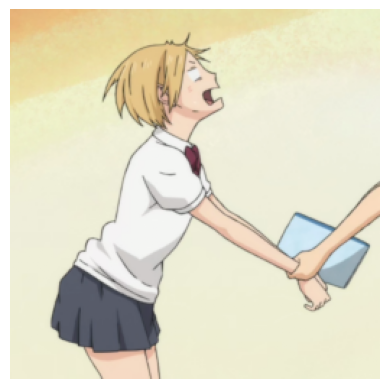

In [9]:
show_image(train_noise_loader)

image class:
 tensor(2)
image tensor:
 tensor([[[0.1647, 0.1647, 0.1569,  ..., 0.2314, 0.2314, 0.2314],
         [0.1686, 0.1608, 0.1569,  ..., 0.2314, 0.2314, 0.2314],
         [0.1686, 0.1647, 0.1569,  ..., 0.2314, 0.2314, 0.2314],
         ...,
         [0.7059, 0.7098, 0.7059,  ..., 0.1608, 0.1569, 0.1608],
         [0.6980, 0.7059, 0.7137,  ..., 0.1608, 0.1569, 0.1647],
         [0.6941, 0.7098, 0.7255,  ..., 0.1608, 0.1608, 0.1608]],

        [[0.1490, 0.1490, 0.1412,  ..., 0.2275, 0.2275, 0.2275],
         [0.1529, 0.1451, 0.1412,  ..., 0.2275, 0.2275, 0.2275],
         [0.1529, 0.1490, 0.1412,  ..., 0.2275, 0.2275, 0.2275],
         ...,
         [0.6706, 0.6745, 0.6706,  ..., 0.1882, 0.1843, 0.1804],
         [0.6588, 0.6667, 0.6784,  ..., 0.1843, 0.1843, 0.1843],
         [0.6510, 0.6706, 0.6902,  ..., 0.1843, 0.1843, 0.1804]],

        [[0.1176, 0.1176, 0.1098,  ..., 0.2000, 0.2000, 0.2000],
         [0.1216, 0.1137, 0.1098,  ..., 0.2000, 0.2000, 0.2000],
         [0.1216, 0

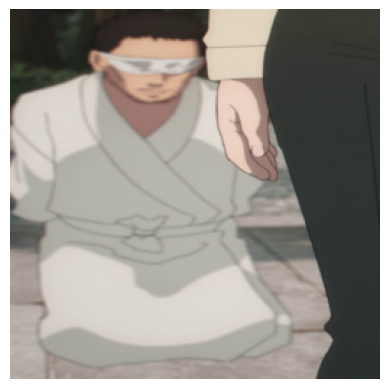

In [10]:
show_image(test_noise_loader)